Optimal Energy Group Indices: [244  27 172 158  64 221 161 119 103 209 102 184 247  79 194 159 191 195
  91 246 157 216  62 248 189 206  36  61 111  14  23  89  92 219  94  80
 105 123  19 115 190 114  98 149 145  86 168  37  77 213 231 178 107 179
  78   1 210 230 162 109 127  55 121 237  46 170 197  15 150 205 242  30
 177 106  82  54 200 146 135 234 187 224 211  59 108 101 175  58 151  18
   7  68  50  97 223  22 166  71 181 204 113 239 186 227 241  25 228 112
  40 137 143 214 164  34 147  51 125  83  43 202 225  31 160  11 120]
Optimal Signal Group Indices: [  0   2   3   4   5   6   8   9  10  12  13  16  17  20  21  24  26  28
  29  32  33  35  38  39  41  42  44  45  47  48  49  52  53  56  57  60
  63  65  66  67  69  70  72  73  74  75  76  81  84  85  87  88  90  93
  95  96  99 100 104 110 116 117 118 122 124 126 128 129 130 131 132 133
 134 136 138 139 140 141 142 144 148 152 153 154 155 156 163 165 167 169
 171 173 174 176 180 182 183 185 188 192 193 196 198 199 201 203 20

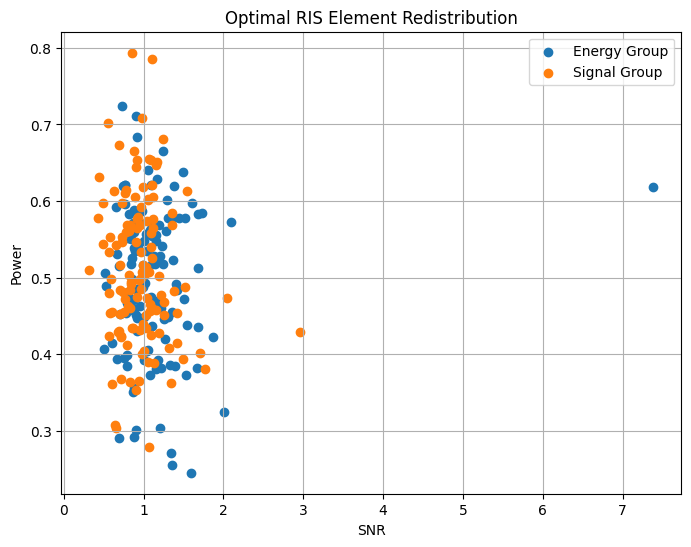

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 250

elements = np.random.normal(0.5, 0.1, (num_elements, 3))

# Brute-force search for optimal redistribution using random sampling
num_samples = 10000  # Adjust the number of samples based on your computation time
best_snr = float('inf')
best_power = float('inf')
best_energy_indices = None
best_signal_indices = None

for _ in range(num_samples):
    split = np.random.choice(range(num_elements), num_elements // 2, replace=False)
    energy_indices = np.array(split)
    signal_indices = np.array(list(set(range(num_elements)) - set(energy_indices)))
    
    # Calculate SNR and power for the current grouping
    current_snr = np.sum(elements[signal_indices, 0]) / np.sum(elements[signal_indices, 2])
    current_power = np.sum(elements[energy_indices, 1])
    
    if current_snr < best_snr and current_power < best_power:
        best_snr = current_snr
        best_power = current_power
        best_energy_indices = energy_indices
        best_signal_indices = signal_indices 

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Optimal SNR:", best_snr)
print("Optimal Power:", best_power)

# Visualize the efficiency
plt.figure(figsize=(8, 6))
plt.scatter(elements[best_energy_indices, 0] / elements[best_energy_indices, 2], elements[best_energy_indices, 1], label='Energy Group')
plt.scatter(elements[best_signal_indices, 0] / elements[best_signal_indices, 2], elements[best_signal_indices, 1], label='Signal Group')
plt.xlabel('SNR')
plt.ylabel('Power')
plt.title('Optimal RIS Element Redistribution')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from heapq import heappop, heappush

# # Define the grid environment
# grid_size = 11
# num_obstacles = 50
# obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
# start = (0, 0)
# goal = (grid_size - 1, grid_size - 1)

# # A* pathfinding with diagonal movements
# def heuristic(a, b):
#     return abs(a[0] - b[0]) + abs(a[1] - b[1])

# def astar(start, goal, max_iterations=10000):
#     open_list = [(0, start)]
#     came_from = {}
#     g_score = {start: 0}
#     iterations = 0

#     while open_list and iterations < max_iterations:
#         current_g, current = heappop(open_list)
#         if current == goal:
#             path = [goal]
#             while current in came_from:
#                 current = came_from[current]
#                 path.append(current)
#             path.reverse()
#             return path

#         for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
#             neighbor = (current[0] + dx, current[1] + dy)
#             if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
#                 tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
#                 if tentative_g < g_score.get(neighbor, float('inf')):
#                     came_from[neighbor] = current
#                     g_score[neighbor] = tentative_g
#                     f_score = tentative_g + heuristic(neighbor, goal)
#                     heappush(open_list, (f_score, neighbor))

#         iterations += 1

#     return None

# # Find optimal path using A* pathfinding
# path = astar(start, goal, max_iterations=50000)

# if path is not None:
#     # Visualize the path and obstacles
#     plt.figure(figsize=(10, 10))
#     plt.plot([p[0] for p in path], [p[1] for p in path], marker='o', linestyle='-', color='blue', label='Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('A* Pathfinding in Grid Environment with Dynamic Obstacles (Curved Path)')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
# else:
#     print("Path not found.")

Best Path Option: A*


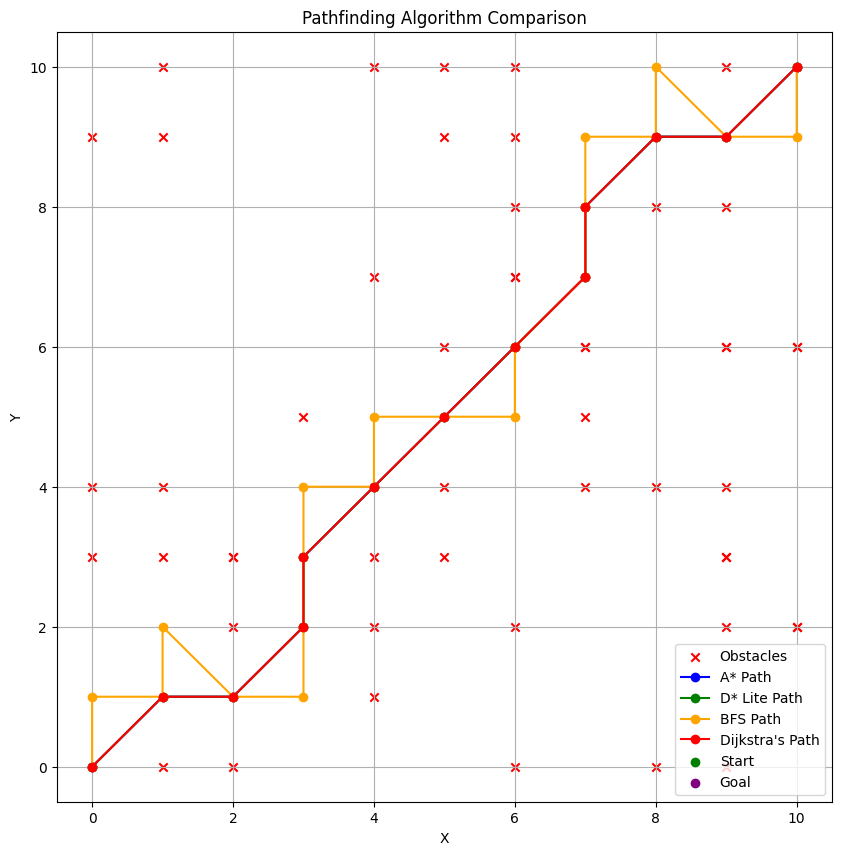

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

def d_star_lite(start, goal):
    open_list = [(0, goal)]
    came_from = {}
    g_score = {goal: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == start:
            path = [start]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, start)
                    heappush(open_list, (f_score, neighbor))

    return None

def bfs(start, goal):
    queue = [start]
    came_from = {}
    visited = set()

    while queue:
        current = queue.pop(0)
        visited.add(current)

        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles and neighbor not in visited:
                queue.append(neighbor)
                came_from[neighbor] = current

    return None

def dijkstra(start, goal):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g
                    heappush(open_list, (f_score, neighbor))

    return None

# Find optimal path using A* pathfinding
path_astar = astar(start, goal, max_iterations=50000)

# Find optimal path using D* Lite
path_d_star_lite = d_star_lite(start, goal)

# Find optimal path using Breadth-First Search
path_bfs = bfs(start, goal)

# Find optimal path using Dijkstra's algorithm
path_dijkstra = dijkstra(start, goal)

# Calculate path lengths
path_lengths = {
    "A*": len(path_astar) if path_astar is not None else float('inf'),
    "D* Lite": len(path_d_star_lite) if path_d_star_lite is not None else float('inf'),
    "BFS": len(path_bfs) if path_bfs is not None else float('inf'),
    "Dijkstra's": len(path_dijkstra) if path_dijkstra is not None else float('inf')
}

# Find the shortest path
best_option = min(path_lengths, key=path_lengths.get)

# Print the best option
print("Best Path Option:", best_option)

# Visualize the paths and obstacles
plt.figure(figsize=(10, 10))

# # A* path
# if path_astar is not None:
#     plt.subplot(2, 2, 1)
#     plt.plot([p[0] for p in path_astar], [p[1] for p in path_astar], marker='o', linestyle='-', color='blue', label='A* Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('A* Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("A* path not found.")

# # D* Lite path
# if path_d_star_lite is not None:
#     plt.subplot(2, 2, 2)
#     plt.plot([p[0] for p in path_d_star_lite], [p[1] for p in path_d_star_lite], marker='o', linestyle='-', color='green', label='D* Lite Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('D* Lite Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("D* Lite path not found.")

# # Breadth-First Search path
# if path_bfs is not None:
#     plt.subplot(2, 2, 3)
#     plt.plot([p[0] for p in path_bfs], [p[1] for p in path_bfs], marker='o', linestyle='-', color='orange', label='BFS Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Breadth-First Search Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("BFS path not found.")

# # Dijkstra's path
# if path_dijkstra is not None:
#     plt.subplot(2, 2, 4)
#     plt.plot([p[0] for p in path_dijkstra], [p[1] for p in path_dijkstra], marker='o', linestyle='-', color='red', label="Dijkstra's Path")
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title("Dijkstra's Algorithm")
#     plt.legend()
#     plt.grid(True)
# else:
#     print("Dijkstra's path not found.")

# plt.tight_layout()
# plt.show()
# Plotting obstacles
plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')

# Plot all paths
if path_astar is not None:
    plt.plot([p[0] for p in path_astar], [p[1] for p in path_astar], marker='o', linestyle='-', color='blue', label='A* Path')

if path_d_star_lite is not None:
    plt.plot([p[0] for p in path_d_star_lite], [p[1] for p in path_d_star_lite], marker='o', linestyle='-', color='green', label='D* Lite Path')

if path_bfs is not None:
    plt.plot([p[0] for p in path_bfs], [p[1] for p in path_bfs], marker='o', linestyle='-', color='orange', label='BFS Path')

if path_dijkstra is not None:
    plt.plot([p[0] for p in path_dijkstra], [p[1] for p in path_dijkstra], marker='o', linestyle='-', color='red', label="Dijkstra's Path")

plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pathfinding Algorithm Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Calculate SNR improvement and power reduction for the current element
def calculate_metrics(current, goal, ris_indices):
    # Your calculations for snr_improvement and power_reduction here
    # For now, let's assume they are equal to zero
    snr_improvement = 0
    power_reduction = 0
    return snr_improvement, power_reduction

# Combine metrics with defined weightings
def combined_cost(current, goal, ris_indices):
    pathfinding_cost = heuristic(current, goal)
    snr_improvement, power_reduction = calculate_metrics(current, goal, ris_indices)
    w_pathfinding = 0.5  # Weight for pathfinding cost
    w_snr_improvement = 0.3  # Weight for SNR improvement
    w_power_reduction = 0.2  # Weight for power reduction
    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
    return total_cost

def astar_with_ris(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + combined_cost(neighbor, goal, best_energy_indices)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding with RIS optimization
path_with_ris = astar_with_ris(start, goal, max_iterations=50000)

if path_with_ris is not None:
    # Visualize the original and optimized paths along with obstacles
    plt.figure(figsize=(10, 10))
    
    # Original A* path
    if path:
     plt.plot([p[0] for p in path], [p[1] for p in path], marker='o', linestyle='-', color='blue', label='Original Path')

    if path_with_ris is not None:
        # Optimized A* path with RIS optimization
        plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='green', label='Optimized Path with RIS')
        
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('A* Pathfinding with RIS Optimization and Dynamic Obstacles (Comparative Paths)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Path not found.")



NameError: name 'path' is not defined

<Figure size 1000x1000 with 0 Axes>

Optimal Energy Group Indices: [98 96 16 56 60 33 95 86  6 87 77 28 49 36 52 62 12  3 40  2 89 73 24 41
 67 26 37 34 20 69 78 85 71 29 72 10 76 46 32 38 94 23 45 48 25 79 74 17
 91 84]
Optimal Signal Group Indices: [ 0  1  4  5  7  8  9 11 13 14 15 18 19 21 22 27 30 31 35 39 42 43 44 47
 50 51 53 54 55 57 58 59 61 63 64 65 66 68 70 75 80 81 82 83 88 90 92 93
 97 99]
Optimal SNR: 0.9391966721234504
Optimal Power: 23.256402201846704


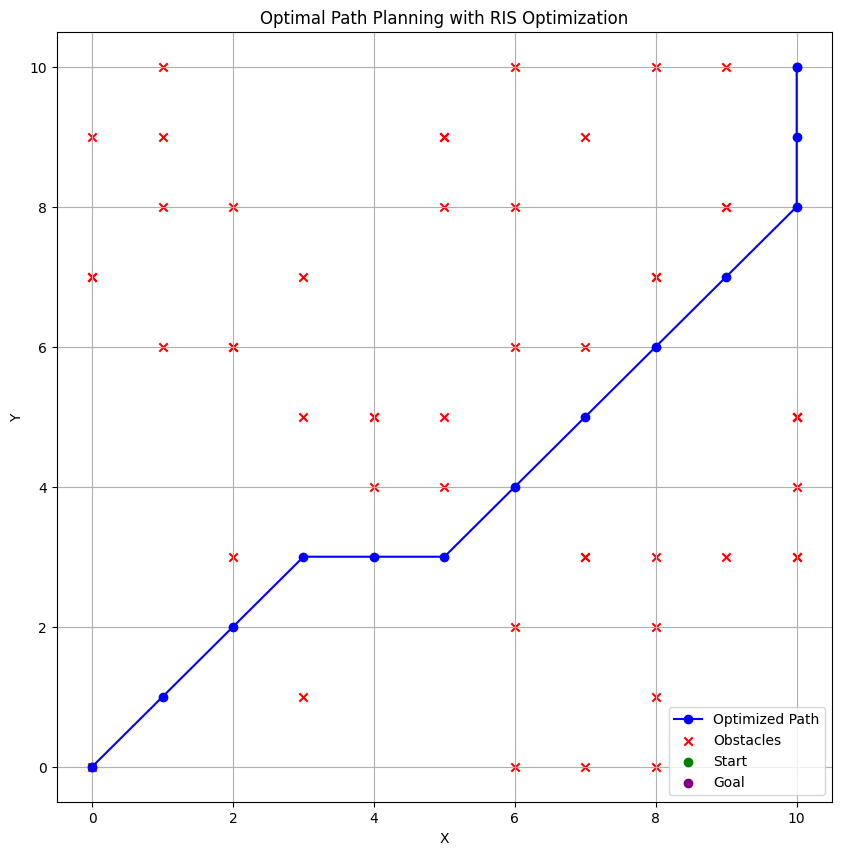

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 100
elements = np.random.normal(0.5, 0.1, (num_elements, 3))

# Brute-force search for optimal redistribution using random sampling
num_samples = 1000  # Adjust the number of samples based on your computation time
best_snr = float('inf')
best_power = float('inf')
best_energy_indices = None
best_signal_indices = None

for _ in range(num_samples):
    split = np.random.choice(range(num_elements), num_elements // 2, replace=False)
    energy_indices = np.array(split)
    signal_indices = np.array(list(set(range(num_elements)) - set(energy_indices)))
    
    # Calculate SNR and power for the current grouping
    current_snr = np.sum(elements[signal_indices, 0]) / np.sum(elements[signal_indices, 2])
    current_power = np.sum(elements[energy_indices, 1])
    
    if current_snr < best_snr and current_power < best_power:
        best_snr = current_snr
        best_power = current_power
        best_energy_indices = energy_indices
        best_signal_indices = signal_indices

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Optimal SNR:", best_snr)
print("Optimal Power:", best_power)

# A* pathfinding with diagonal movements and RIS optimization
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def calculate_metrics(current, goal, ris_indices):
    # Calculate SNR improvement and power reduction based on RIS optimization
    old_snr = np.sum(elements[current, 0]) / np.sum(elements[current, 2])
    
    ris_elements = elements[ris_indices]
    new_snr = np.sum(ris_elements[:, 0]) / np.sum(ris_elements[:, 2])
    
    snr_improvement = new_snr - old_snr
    
    old_power = np.sum(elements[current, 1])
    new_power = np.sum(ris_elements[:, 1])
    
    power_reduction = old_power - new_power
    
    return snr_improvement, power_reduction

def astar_with_ris(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    snr_improvement, power_reduction = calculate_metrics(neighbor, goal, best_energy_indices)
                    pathfinding_cost = heuristic(neighbor, goal)
                    w_pathfinding = 0.5  # Weight for pathfinding cost
                    w_snr_improvement = 0.3  # Weight for SNR improvement
                    w_power_reduction = 0.2  # Weight for power reduction
                    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
                    heappush(open_list, (total_cost, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding with RIS optimization
path_with_ris = astar_with_ris(start, goal, max_iterations=50000)

if path_with_ris is not None:
    # Visualize the original and optimized paths along with obstacles
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='blue', label='Optimized Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Optimal Path Planning with RIS Optimization')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Path not found.")
